In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


In [8]:
from PIL import Image
from pathlib import Path

for p in Path("data/cats_vs_dogs").rglob("*"):
    try:
        if p.is_file():
            img = Image.open(p).convert("RGB")
            img.save(p.with_suffix(".jpg"))
    except:
        p.unlink()


D:\anaconda\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [9]:
data_dir = Path("data")
data_dir =data_dir / "cats_vs_dogs"

img_size = (160, 160)
batch_size = 64

dataset = keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

class_names = dataset.class_names
print("Classes:", class_names)


Found 24998 files belonging to 2 classes.
Classes: ['Cat', 'Dog']


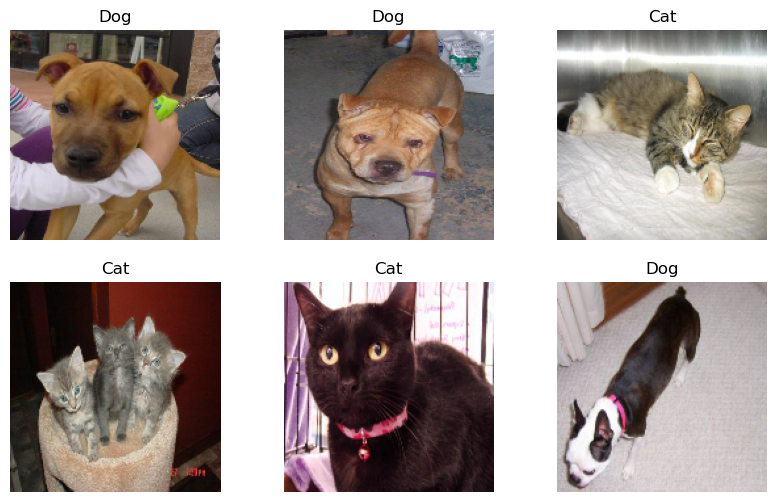

In [10]:
plt.figure(figsize=(10, 6))

for images, labels in dataset.take(1):
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()


In [11]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(160, 160, 3)),

    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")   # binary classification
])


In [12]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 160, 160, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 80, 80, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 80, 80, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 40, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 40, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,105 (25.36 MB)

 Trainable params: 6,647,105 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    dataset,
    epochs=3
)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 349ms/step - accuracy: 0.6555 - loss: 0.6201
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 317ms/step - accuracy: 0.7674 - loss: 0.4827
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 318ms/step - accuracy: 0.8155 - loss: 0.4048


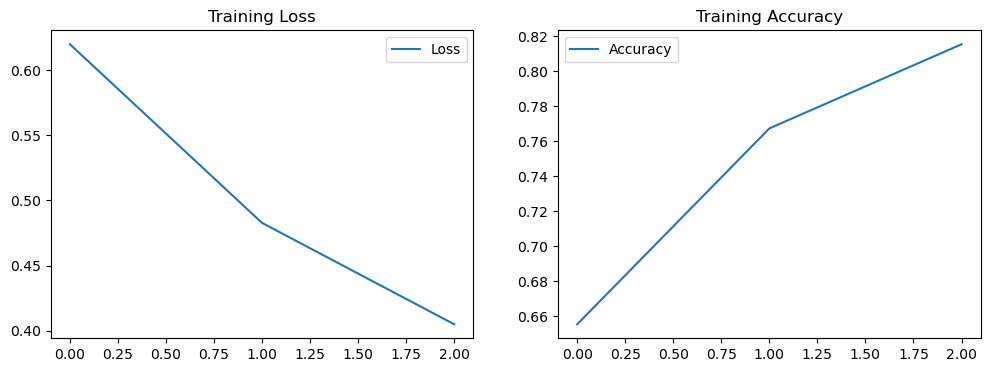

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Loss")
plt.legend()
plt.title("Training Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Accuracy")
plt.legend()
plt.title("Training Accuracy")

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


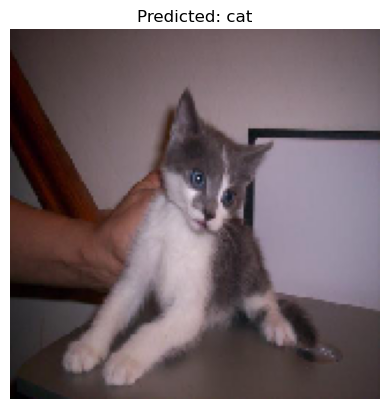

In [25]:
import random

all_images = list(data_dir.glob("*/*.jpg"))
img_path = random.choice(all_images)

img = keras.utils.load_img(img_path, target_size=img_size)
img_array = keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # make batch

prediction = model.predict(img_array)[0][0]

pred_label = "dog" if prediction > 0.5 else "cat"

plt.imshow(img)
plt.title(f"Predicted: {pred_label}")
plt.axis("off")
plt.show()
